In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 73269, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 73269 (delta 93), reused 156 (delta 81), pack-reused 73097
Receiving objects: 100% (73269/73269), 579.40 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (51870/51870), done.


In [3]:
cd /content/models/research

/content/models/research


In [4]:
!protoc object_detection/protos/*.proto --python_out=.

In [5]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 7.97 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [6]:
cd cocoapi/PythonAPI/

/content/models/research/cocoapi/PythonAPI


In [7]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [8]:
cp -r pycocotools /content/models/research

In [9]:
cd /content/models/research/

/content/models/research


In [10]:
cp object_detection/packages/tf2/setup.py .

In [11]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 61.1 MB/s 
     |████████████████████████████████| 352 kB 56.6 MB/s 
     |████████████████████████████████| 2.1 MB 57.2 MB/s 
     |████████████████████████████████| 25.9 MB 87.7 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 1.2 MB 69.4 MB/s 
     |████████████████████████████████| 237 kB 75.5 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
     

In [12]:
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-02 08:07:49.903169: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0602 08:07:50.450957 139797587769216 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.31s
I0602 08:07:51.162090 139797587769216 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 2.31s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.97s
I0602 08:07:52.141736 139797587769216 test_u

In [13]:
!mkdir /content/training
!cd /content/training/
!mkdir /content/training/annotations
!mkdir /content/training/models 
!mkdir /content/training/pre-trained-models 
!mkdir /content/training/exported-models

In [ ]:
!cd /content
from google.colab import drive
drive.mount('/content/drive/')

In [15]:
!unzip '/content/drive/MyDrive/new/images.zip' -d '/content/training/images/'

Archive:  /content/drive/MyDrive/new/images.zip
   creating: /content/training/images/train/
  inflating: /content/training/images/train/paper_10.jpg  
  inflating: /content/training/images/train/paper_10.xml  
  inflating: /content/training/images/train/paper_100.jpg  
  inflating: /content/training/images/train/paper_100.xml  
  inflating: /content/training/images/train/paper_101.jpg  
  inflating: /content/training/images/train/paper_101.xml  
  inflating: /content/training/images/train/paper_102.jpg  
  inflating: /content/training/images/train/paper_102.xml  
  inflating: /content/training/images/train/paper_103.jpg  
  inflating: /content/training/images/train/paper_103.xml  
  inflating: /content/training/images/train/paper_104.jpg  
  inflating: /content/training/images/train/paper_104.xml  
  inflating: /content/training/images/train/paper_105.jpg  
  inflating: /content/training/images/train/paper_105.xml  
  inflating: /content/training/images/train/paper_106.jpg  
  inflati

In [41]:
cd /content/training/pre-trained-models/

/content/training/pre-trained-models


In [42]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-06-02 09:28:36--  http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.10.128, 2404:6800:4003:c0f::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.10.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44016454 (42M) [application/x-tar]
Saving to: ‘centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz’

centernet_mobilenet 100%[===================>]  41.98M  40.4MB/s    in 1.0s    

2022-06-02 09:28:38 (40.4 MB/s) - ‘centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz’ saved [44016454/44016454]



In [43]:
!tar -xvf centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz
#!tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
#!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

centernet_mobilenetv2_fpn_od/
centernet_mobilenetv2_fpn_od/model.tflite
centernet_mobilenetv2_fpn_od/saved_model/
centernet_mobilenetv2_fpn_od/saved_model/saved_model.pb
centernet_mobilenetv2_fpn_od/saved_model/variables/
centernet_mobilenetv2_fpn_od/saved_model/variables/variables.index
centernet_mobilenetv2_fpn_od/saved_model/variables/variables.data-00000-of-00001
centernet_mobilenetv2_fpn_od/saved_model/assets/
centernet_mobilenetv2_fpn_od/label_map.txt
centernet_mobilenetv2_fpn_od/pipeline.config
centernet_mobilenetv2_fpn_od/checkpoint/
centernet_mobilenetv2_fpn_od/checkpoint/ckpt-301.index
centernet_mobilenetv2_fpn_od/checkpoint/checkpoint
centernet_mobilenetv2_fpn_od/checkpoint/ckpt-301.data-00000-of-00001


In [19]:
cd /content/training

/content/training


In [20]:
# Create train data:
!python generate_tfrecord.py -x /content/training/images/train -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training/images/test -l /content/training/annotations/label_map.pbtxt -o /content/training/annotations/test.record


Successfully created the TFRecord file: /content/training/annotations/train.record
Successfully created the TFRecord file: /content/training/annotations/test.record


In [21]:
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [22]:
!cd /content/training

In [23]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [24]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 40 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 11s (37.9 MB/s)
(Reading database ... 155629 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155607 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+

In [44]:
!mkdir /content/training/models/my_centernet_mobilenetv2_fpn
!cp /content/training/pre-trained-models/centernet_mobilenetv2_fpn_od/pipeline.config /content/training/models/my_centernet_mobilenetv2_fpn/

In [59]:
cd /content/training/

/content/training


In [62]:
#!python model_main_tf2.py --model_dir=/content/training/models/my_ssd_mobilenet_v2_fpnlite --pipeline_config_path=/content/training/models/my_ssd_mobilenet_v2_fpnlite/pipeline.config

In [58]:
cd /content/training/

/content/training


In [63]:
#!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training/models/my_ssd_mobilenet_v2_fpnlite/pipeline.config --trained_checkpoint_dir /content/training/models/my_ssd_mobilenet_v2_fpnlite --output_directory /content/training/exported-models

In [35]:
!cp -r /content/drive/MyDrive/new/inference_images /content/training/

In [36]:
!cp -r /content/training/exported-models/ssd-mobilenetV2-fpnlite /content/drive/MyDrive/new/

Loading model...Done! Took 11.784154176712036 seconds
Running inference for /content/training/inference_images/rock_125.jpg... Done


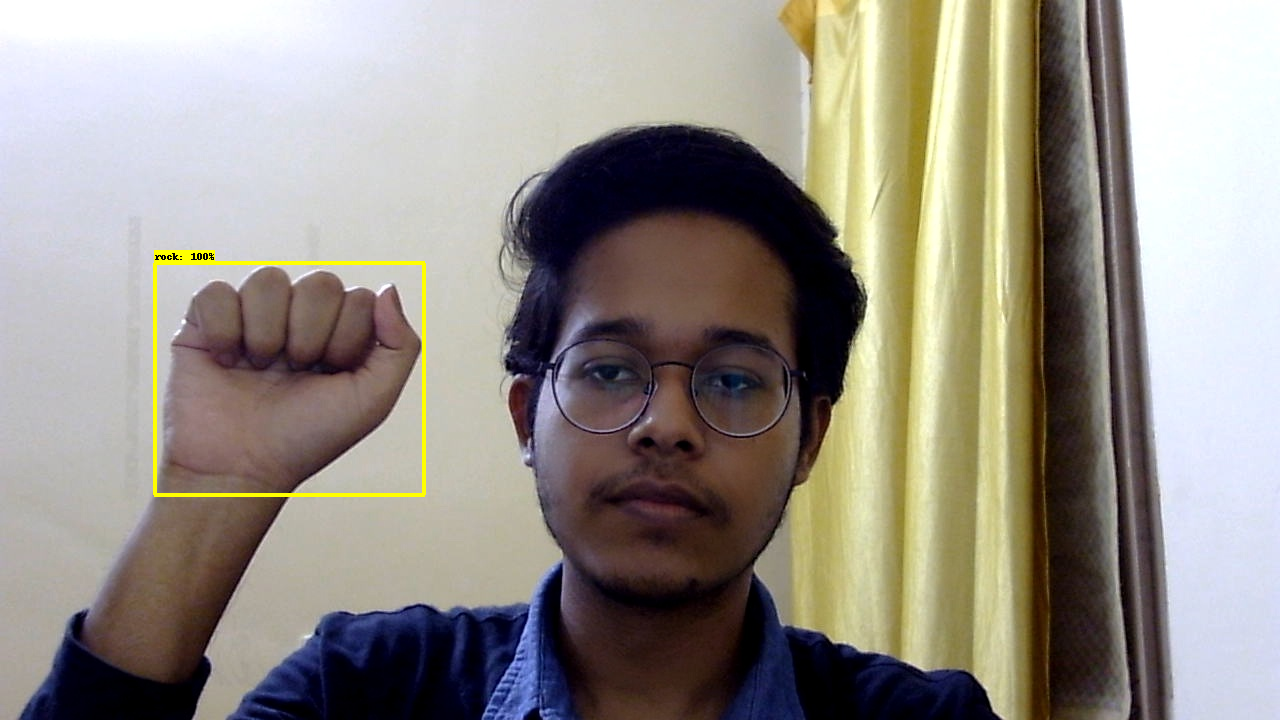

In [40]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training/inference_images/rock_125.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training/exported-models/ssd-mobilenetV2-fpnlite'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = '/content/training/exported-models/ssd-mobilenetV2-fpnlite/saved_model'

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))
# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]
# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

In [55]:
!tensorboard --logdir=/content/training/models/my_ssd_mobilenet_v2_fpnlite --load_fast=true

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags) or 0
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 292, in _run_serve_subcommand
    server = self._make_server()
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/program.py", line 472, in _make_server
    deprecated_multiplexer,
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/backend/application.py", line 146, in TensorBoardWSGIApp
    exp